# Yet Another Machine Learning 101

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In general, we distinguish between three general paradigms in ML

- **Supervised Learning**
- **Unsupervised Learning**
- **Reinforcement Learning**

Additionally, there is a variety of other paradigms, which are not going to be covered here, such as **semi-supervised learning** and **learning from side information**. 

## General setting

In all types of machine learning the goal is to learn a function to predict some output from some input data:

$$f: X \rightarrow Y$$

The different paradigms differ in 
- the goal, i.e. what kind of guys $X$ and $Y$ are
- the training data available to learn $f$

We will now review the different settings and give examples.

## Supervised Learning

Supervised learning is by far the most popular paradigm. Here, we are directly given examples from $X$ and $Y$, i.e. pairs $\{ x^{(i)}, y^{(i)} \}_{i=1\ldots n }$. The data $x^{(i)}$ are called the *input data* and $y^{(i)}$ the *labels*.
Together, they are called the *training data*.

Any ML method usually consists of three ingredients.
- A representation of $f$, i.e. whether it is a linear function, or non-parametric, etc. 
- An appropriate *loss function* $\mathcal{L}$,
- which is minimized using an *optimization method*. 

The loss function for supervised learning looks as follows:

$$f = argmin_{f} \mathcal{L} ( \{ x^{(i)}, y^{(i)} \}_{i=1\ldots n })$$

A *loss function* can be thought of as an assessment of how good $f$ fits the training data. If its value is high, it means that $f(x^{(i)})$, i.e. the prediction of our current function $f$ given $x^{(i)}$, is very different from the known value $y^{(i)}$. If $\mathcal{L} = 0$, it means the $f$ perfectly fits the data. 

An *optimization* method can be thought of as some method that is given data and a loss function and automatically tries to find the minimal function fulfilling the loss. There is a wide variety of optimization methods, and they mostly differ by the knowlegde they have about $f$, and about the properties of $f$ (e.g. if $f$ is differentiable, we can compute its derivative, set it to zero, and go step by step in the direction of steepest descent; this is called *gradient descent optimization*). We will mostly treat optimization as a black-box here, but it is of course the success in learning a function greatly depends on the optimization used.

The representation of $f$ also drastically influences. The easiest and best-understood representation are linear functions, but also neural networks (which are some sort of nonlinear functions) are very common nowadays.  

Usually you don't have to worry about choosing $f$, the loss and the optimization if you just want to apply some ML method. An ML method usually determines all three things, and is tuned in such a way that all of them work together nicely.


### Overfitting

However, only making $\mathcal{L}=0$ for the training data, i.e. only fitting the training data does not necessarily solve the problem -- the task is to learn an $f$ that *generalizes* to unseen examples $x^{(j)}$. Fitting the training data is very easy: just memorize all of them by heart! Therefore, the core problem of any machine learning to learn an $f$ that generalizes. If $f$ only works well on the training data, but not on unseen data, $f$ is said to *overfit*.

### Example: Linear regression

Let us consider a simple example for supervised learning: *linear regression*.

Assume we want to predict the price of apartments in Berlin, given their size of square meters of the apartment. Here is the data (for example collected from wg-gesucht.de):

<table style="border 1px solid black;">
<tr>
<th> $X$ (square meters) </th>
<th> $Y$ (monthly rent in Euro)</th>
</tr>
<tr>
<td>40</td><td>500</td>
</tr>
<tr>
<td>65</td><td>620</td>
</tr>
<tr>
<td>80</td><td>855</td>
</tr>
<tr>
<td>81</td><td>910</td>
</tr>
<tr>
<td>100</td><td>1100</td>
</tr>
<tr>
<td>120</td><td>1250</td>
</tr>
</table>

Let's plot the data

/Users/Hoefer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


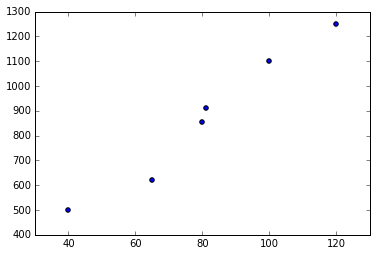

In [3]:
X = array([40, 65, 80, 81, 100, 120]).reshape((-1, 1))
Y = array([500, 620, 855, 910, 1100, 1250])

scatter(X, Y)

The idea is linear regression is to fit a linear function, i.e. a line of the form $f(x) = w_1 x + w_0$ to the data. To learn such a line we define as loss the *mean-squared error* which penalizes large deviations of $f(x)$ from the known $y$:
$$ \mathcal{L}_\textrm{MSE}
= \frac{1}{2}  \sum_{i=0}^N ( f(x^{(i)}) - y^{(i)})^2\\
= \frac{1}{2} \sum_{i=0}^N ( w_1 x^{(i)} + w_0 - y^{(i)})^2
$$

Maybe you are a bit confused about the fraction $\frac{1}{2}$. The reason we use it, because if we compute the derivative $\mathcal{L}_\textrm{MSE}$, the square within the sum cancels out this fraction.

Note that usually $x$ is multi-dimensional, i.e. a vector $\mathbf{x}$. Then $w_1$ becomes a weight vector $\mathbf{w}$. 
We can do another trick to get rid of $w_0$ (called the *bias* term) by appending a $1$ to $\mathbf{x}$, and extending $\mathbf{w}$ by one dimension. This facilitates notation a bit, as it allows us to write the loss in matrix form:

$$ \mathcal{L}_\textrm{MSE} = \frac{1}{2} \sum_{i=0}^N ( \mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2$$

### Gradient descent

How to optimize it? One way is to compute the derivative wrt. each $j$-th element of the weight, and set it to zero:

$$
\frac{d \mathcal{L}_\textrm{MSE}}{d {w}_j} 
= \frac{1}{2} \sum_{i=0}^N \frac{d}{d {w}_j} 
( \mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2 \\
= \frac{1}{2} \sum_{i=0}^N 2 w_j^{(i)}  (w_j x_j^{(i)} - y^{(j)})\\
= w_j  \sum_{i=0}^N \mathbf{x}^{(i)}  (w_j  x_j^{(i)} - y^{(j)})
$$

By setting this expression 0, solving for $w_j$ and changing all weights by a small amount according to this.

TODO

This is called *gradient descent*. It is a very important technique, very popular especially for training neural networks.

### Ordinary least squares

In the linear regression case, however, there is a more direct solution. If we consider $\mathbf{w}$ to be a matrix rather then a vector, we can write the loss in the following way:

$$ \mathcal{L}_\textrm{MSE} = \mathbf{X}\mathbf{w} - \mathbf{y}$$
where $\mathbf{X}$ contains in each $i$-th *row* on training example $\mathbf{x}^{(i)}$, and $\mathbf{y}$ in each $i$-th row a label  $y^{(i)}$.

Now we can set it 0, bring $\mathbf{y}$ to the right-hand side and solve for $\mathbf{w}$. To that we need to invert $\mathbf{X}$ -- which is usually not possible because it is not square in the general case. But we can apply a trick: using the pseudo-inverse: 

$$\mathbf{X}\mathbf{w} = \mathbf{y}\\
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}\\
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^-1 \mathbf{X}^T\mathbf{y}\\
$$
where $(\mathbf{X}^T\mathbf{X})^-1 \mathbf{X}^T$ is also known as the *pseudo-inverse*.

### Computational example

Let's now implement this in python. 



In [36]:
# transpose training data and append 1
Xhat = np.hstack([X, np.ones((X.shape[0],1.))])
w = np.linalg.inv(Xhat.T.dot(Xhat)).dot(Xhat.T).dot(Y)
w

array([ 10.04581152,  58.78926702])

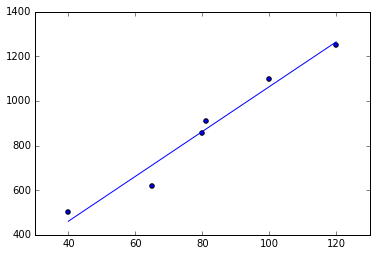

In [41]:
scatter(X, Y)
plot(X, Xhat.dot(w))

Luckily, there are libraries that do all that for us. One of the most popular ML libraries in python is *scikit learn*. 
We can easily verify that it computes the same function:

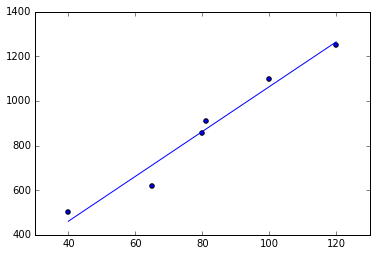

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)

scatter(X, Y)
plot(X, lr.predict(X))

The blue line is now our prediction. And you see that it fits the data Ok, but not perfectly. Still, it looks like a reasonable guess. Most importantly, it also makes a prediction for inputs $x$ for which we did not have any training data.

TODO Overfitting.


## Common Supervised Learning

### (Deep) Neural Networks

Currently, they are the hot shit in supervised learning. The idea is to compose a function of small slightly nonlinear functions (neurons).

# Unsupervised Learning

Unsupervised differs from supervised learning that we are only given $\{x^(i)\}_{i=1 \ldots N}$, an no labels. This obviously means that the loss functions we've seen so far will not work. Instead the loss functions impose some "statistical" constraints on $y$. A good example is *Principal component analysis* (PCA): here we want to learn a low-dimensional variant of $x$. The loss function for PCA states, that $y$ should preserve the dimensions in $x$ with high variance.

# TODO more elaborate

In [ ]:
# Reinforcement Learning